## Task 1: Data Preparation

In [1]:
# import libaries
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.precision', 2)

# load the data
dataset = pd.read_csv("dataset.csv")


# Get only id, score and text
dataset = dataset[["Id", "Score", "Text"]]

Only the columns ‘Id’, ‘Score’ and ‘Text’ are used, and so the other columns are omitted from the dataset.

### Sentiment Analysis

In [2]:
# Add new col "Label"
dataset["Label"] = np.where(dataset["Score"] > 3, "pos", "neg")

# Ignore rows with Score = 3
dataset = dataset.loc[(dataset["Score"] != 3)]

# dataset["Label"].value_counts()

To perform sentiment analysis, the dataset was annotated using the already provided score column. Scores above 3 (4, 5) were assigned positive and scores under 3 (1, 2) were assigned negative. A score of exactly 3 suggested a neutral score and so were removed from the list.

### Check Duplicates

In [3]:
# count number of duplicates in the data
dataset.duplicated().sum()

0

There are no duplicates in the data.

### Score Column

count    28054.00
mean         4.23
std          1.37
min          1.00
25%          4.00
50%          5.00
75%          5.00
max          5.00
Name: Score, dtype: float64


5    19354
4     3874
1     3162
2     1664
Name: Score, dtype: int64

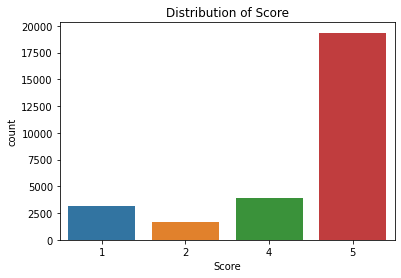

In [4]:
# create histogram
sns.countplot(data=dataset, x="Score").set(title="Distribution of Score")

#describe values
print(dataset["Score"].describe())

#count values
dataset["Score"].value_counts()

It can be seen that the overwhelming majority of reviews gave a score of 5, with approx. 69% (19354 of 28054) giving this score. This resulted in the average score given as 4.23. The least likely score given is 2, with only 5.9% (1664 of 28054) giving this score.

### Label Column

pos    23228
neg     4826
Name: Label, dtype: int64

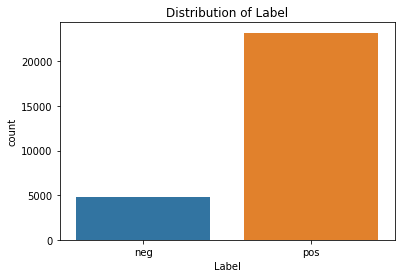

In [5]:
# create histogram
sns.countplot(data=dataset, x="Label").set(title="Distribution of Label")

dataset["Label"].value_counts()

Likewise, the overwhelming majority of reviews had a positive sentiment. There are 23288 positive reviews and only 4826 negative reviews. For every negative review, there is approximately 4.8 positive reviews.

## Task 2: Data Cleaning

A couple texts were analysed to see certain qualities that need to be cleaned.

In [6]:
dataset.loc[18, "Text"]

"I found it much tastier than the plain tuna pouches out there. Excellent quality, and no need to 'dress it up'.<br /><br />I put it the micro on about 20% power for 1 minute and Shazam!<br /><br />I believe a little heating brings out the flavor."

In [7]:
dataset.loc[503, "Text"]

'I bought this with the Presto 04830 PowerPop Microwave Multi-Popper back in July and have been very, very pleased.  Almost no kernels left in the bottom and fluffy, large popcorn.  Getting ready to reorder so I thought I would pass it on.<a href="http://www.amazon.com/gp/product/B00005IBXK">Presto 04830 PowerPop Microwave Multi-Popper</a>'

It can be noticed there are html tags such as break or links, and also wierd characters and numbers. Since these are not useful for the data analysis, they will be removed, leaving only words.

In [8]:
import re

def clean_text(text):
    # remove all html tags
    text = re.sub("<[^>]*>", " ", text)
    
    # remove any weird characters
    text = re.sub(r"[^A-Za-z*'-]+", " ", text)
    
    # convert text to lowercase
    text = text.lower().strip()
    
    return text

In [9]:
dataset["Text"] = dataset["Text"].apply(clean_text)

In [10]:
dataset.loc[18, "Text"]

"i found it much tastier than the plain tuna pouches out there excellent quality and no need to 'dress it up' i put it the micro on about power for minute and shazam i believe a little heating brings out the flavor"

In [11]:
dataset.loc[503, "Text"]

'i bought this with the presto powerpop microwave multi-popper back in july and have been very very pleased almost no kernels left in the bottom and fluffy large popcorn getting ready to reorder so i thought i would pass it on presto powerpop microwave multi-popper'

It can be seen that after applying the clean_text() function, the remaining text only contains words useful for data analysis.

#### Explanation
The purpose of cleaning the text is to unnecessary text that may negatively impact the accuracy of the logistic regeression. To do this, example text was first investigated. It was found that the next contained html tags and wierd characters that are not useful. Additinally text should be made all lowercase to be consistent. To clean this, a function was made using regex that would remove all html tags (all text that surrounded by '<' and '>') all weird characters (leave only letters and -) and make text lowercase. This function was applied to the entire text column, cleaning the dataset.

## Task 3: Logistic Regression

The data is split into train and test set. 70% of rows (train) will be used to develop the text and 30% of rows (test) will be used to evaluate the model.

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

# define random state to make random processes reproducible
random_state = np.random.RandomState(0)

In [13]:
# Define X(features) and y(target)
X = dataset["Text"]
y = dataset["Label"]

# split the data into train-test split where 30% of data will be used as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)

The text is converted to a numeric vector, suitable for inputting into a logistic regression model. This is done by representing the text as a bag of words, the number of times a particular word appears in each text is kept track of.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

In [15]:
# define stop words
stop_words = stopwords.words('english')

In [16]:
# define CountVectorizer object
# min_df=0.01 means words that belong to only 1% of the all tweets will be excluded in the BOW
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), min_df=0.01)
# vectorizer = CountVectorizer(stop_words=stopwords.words('english'))

# fit the vectorizer object to train data
vectorizer.fit(X_train)

# get the BOW for train data
X_train_BOW = vectorizer.transform(X_train)

In [17]:
# visualize BOW
training_data_BOW = pd.DataFrame(data=X_train_BOW.toarray(), columns=vectorizer.get_feature_names_out()).T

# display the last few rows of the dataframe
training_data_BOW.head(5)

,0,1,2,3,4,5,6,7,8,9,...,19627,19628,19629,19630,19631,19632,19633,19634,19635,19636
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
actually,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
add,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
added,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A logistic regression model will be built using the bag of words above. By taking the bag of words as input, it will predict whether the text is positive or negative.

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
# define lgositic regression model object
log_reg = LogisticRegression(random_state=random_state)

# fit the model to training data
log_reg.fit(X_train_BOW, y_train)

LogisticRegression(random_state=RandomState(MT19937) at 0x7FFF9BFC9A40)

In [20]:
# make prediction on test data

# create BOW for test data
X_test_BOW = vectorizer.transform(X_test)

# predict using log_reg object
y_test_log_reg_predictions = log_reg.predict(X_test_BOW)

# view the predictions
y_test_log_reg_predictions

array(['pos', 'pos', 'pos', ..., 'pos', 'neg', 'pos'], dtype=object)

#### Explanation
Before creatiing a logistic regression model the data was first split into two parts. Train (70%) will be used in order to develop the model and Test (30%) will be used to evaluate the model. The text is unstructured data and so is converted into a numerical representation using the bag of words model. The outcome vector represents how freqeunt each word appears in each review. Logistic regression can then be performed using the train set with BoW as input to determine the relationship between the frequency of words and sentiment. This can then be used to predict whether other reviews are positive or negative.

## Task 4: Evaluate

### a)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Create baseline model where all reviews are positive.

In [22]:
# Baseline model assigns "Pos" to all test data
y_test_baseline_predictions = pd.Series(['pos']*len(y_test))

In [23]:
y_test_log_reg_metrics = {}
y_test_baseline_metrics = {}

# in format {‘accuracy’:0.0, ‘precision’:0.0, ’recall’:0.0, ‘f1-score’:0.0}

# Get accuracy
y_test_log_reg_metrics["accuracy"] = round(accuracy_score(y_test, y_test_log_reg_predictions), 2)
y_test_baseline_metrics["accuracy"] = round(accuracy_score(y_test, y_test_baseline_predictions), 2)

# Get precision
y_test_log_reg_metrics["precision"] = round(precision_score(y_test, y_test_log_reg_predictions, pos_label="neg"), 2)
y_test_baseline_metrics["precision"] = round(precision_score(y_test, y_test_baseline_predictions, pos_label="neg"), 2)


# Get recall
y_test_log_reg_metrics["recall"] = round(recall_score(y_test, y_test_log_reg_predictions, pos_label="neg"), 2)
y_test_baseline_metrics["recall"] = round(recall_score(y_test, y_test_baseline_predictions, pos_label="neg"), 2)


# Get f1-score
y_test_log_reg_metrics["f1-score"] = round(f1_score(y_test, y_test_log_reg_predictions, pos_label="neg"), 2)
y_test_baseline_metrics["f1-score"] = round(f1_score(y_test, y_test_baseline_predictions, pos_label="neg"), 2)



print(f"Baseline: {y_test_baseline_metrics}")
print(f"Logisticregression: {y_test_log_reg_metrics}")

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Baseline: {'accuracy': 0.83, 'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}
Logisticregression: {'accuracy': 0.89, 'precision': 0.72, 'recall': 0.55, 'f1-score': 0.62}


As seen above:
* Accuracy: The baseline model guesses the correct label 83% of the time, while the logistic regressions is correct 88% of the time
* Precision (neg) : The baseline model is 0 as it does not guess negative at all. For logistic regression, when predicting negative, 71% of the time the actual value is also positive.
* Recall (neg) : The baseline model is 0 as it does not guess negative at all. For logistic regression, the model correctly guessed a negative review as negative 54% of the time.
* f1-score (neg) : The baseline model is 0 as it does not guess negative at all. For logistic regression, the model scored 0.61, taking into account precision and recall.

Although the baseline model had an accuracy of 83%, it only got this because 83% of the reviews in the test set were positive. The baseline model had an f1-score of 0 as it since it is all pos, it was not able to correctly identify even 1 review as negative. This is why the f1-score is 0, despite a high accuracy.

### b)

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

### Baseline model confusion matrix

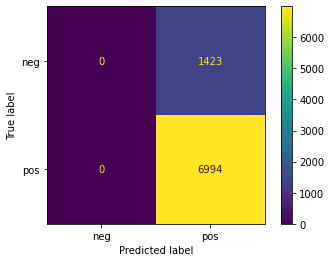

In [25]:
cm = confusion_matrix(y_test, y_test_baseline_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
display.plot();

The baseline model:

* correctly identified 0 negative sentiment tweets as negative. (True Negative - TN)
* correctly identified 6974 positive sentiment tweets as positive. (True Positive - TP)
* incorrectly identified 0 positive sentiment tweets as negative. (False Negative - FN)
* incorrectly identified 1443 negative sentiment tweets as positive. (False Positive - FP)

### Logistics regression model confusion matrix

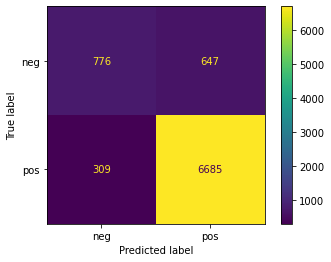

In [26]:
cm = confusion_matrix(y_test, y_test_log_reg_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
display.plot();

The logistics regression model:

* correctly identified 782 negative sentiment tweets as negative. (True Negative - TN)
* correctly identified 6657 positive sentiment tweets as positive. (True Positive - TP)
* incorrectly identified 317 positive sentiment tweets as negative. (False Negative - FN)
* incorrectly identified 661 negative sentiment tweets as positive. (False Positive - FP)

## Task 5: Predictions

In [27]:
# make prediction on predict data
predictdata = pd.read_csv("predictdata.csv")

# Clean data text column
predict_test = predictdata["Text"].copy().apply(clean_text)

# create BOW for test data
predict_test_BOW = vectorizer.transform(predict_test)

# predict using log_reg object
predict_tes_log_reg_predictions = log_reg.predict(predict_test_BOW)

# Add column to dataframe
predictdata["Model Prediction"] = predict_tes_log_reg_predictions

# view the predictions
predictdata

,Id,Text,Model Prediction
0,1,"The candy is tasty, but they totally scam you ...",pos
1,2,I had been looking for the violet candy with t...,pos
2,3,these are very pricey so i only enjoy them now...,pos
3,4,"These candies have a mild flavor, when compare...",pos
4,5,This product is a bit pricey for the amt. rece...,neg


The table above shows the predictions made based on the cleaned text. Upon inspection, the model seemed to have gotten id 2,3,4 correct but id 1,5 incorrect. Suprisingly, for this small sample size, the baseline model would have performed better. This is unlikely to occur for larger sample sizes.

## Task 6
### Word Cloud

In [28]:
# !pip install wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt

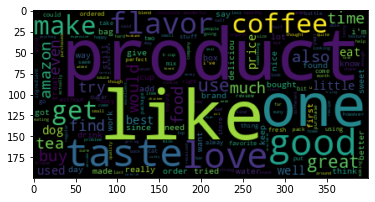

In [29]:
text = " ".join(X_train)
word_cloud = WordCloud(stopwords=set(stop_words)).generate(text)
plt.imshow(word_cloud, interpolation='bilinear');

Shown above is a word cloud visualisation of the frequency of each the words in the tran dataset. Some of the most common words that appear in the reviews of the train dataset are 'one', 'love', 'taste', 'product' and like.

### Identifying important words for predictions

In [30]:
# function adapted from https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Important words with their model coefficient")
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


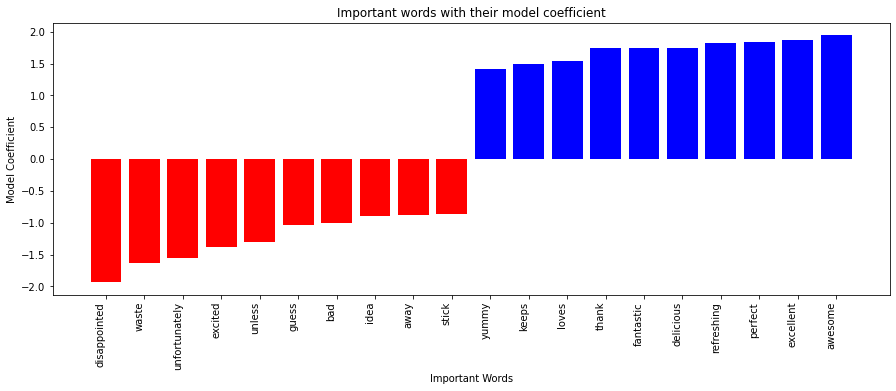

In [31]:
plot_coefficients(log_reg, vectorizer.get_feature_names())

The graph above show which words play a significant role in classifying the sentiment of the review, with red bars representing negative words and blue bars representing positive words. It can be seen that the words 'dissapointed', 'waste' and 'unfortunately' suggest a higher likelyhood that the review is negative. On the otherhand, the words 'awesome', 'excellent' and 'perfect' suggest a higher likelyhood that the review is negative.

## Task 7: Classification with unbalanced data

The issue with imbalanced classification is that the since the data is skewed, the model cannot gather enough information from the minority class to make an accurate prediction. Instead, predicting just the majority class will already result in a high accuracy, and the model will fail to identify minority class, rather treating it as an anomaly. A solution to counter act this is to resample the data using random over-sampling. By resampling the minority data to be of equal size to the majority, the model can use information equally from both classes without losing information (as opposed to under sampling), which could result in better predictions.